<H1>FFT Tool </h1>

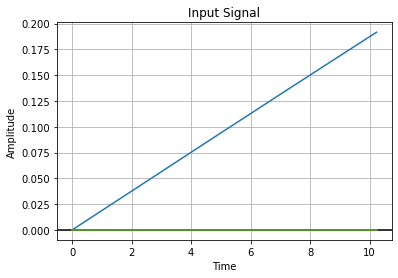

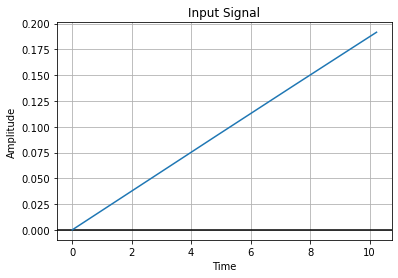

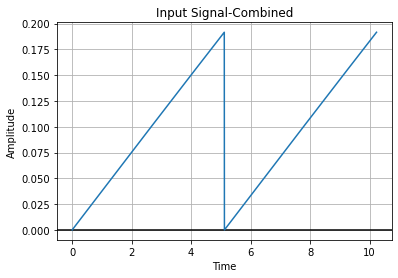

In [1]:
from scipy import signal 
from scipy.fftpack import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
import numpy as np

# Number of sample points
N = 1024


# sample spacing
T = 1.0 / 100

# Synthesized frequencies, Hz
f1 = 0.003
f2 = 0
f3 = 0
#zoom factor for zoomed FFT
zoom = 20

x = np.linspace(0.0, N*T, N, endpoint=False)
x2 = np.linspace(0.0, N*T, N*2, endpoint=False)
yf1 = np.sin(f1 * 2.0*np.pi*x)
yf2 = 0.6 * np.sin(f2 * 2.0*np.pi*x)
yf3 = 0.3 * np.sin(f3 * 2.0*np.pi*x)

y = yf1 + yf2 + yf3

plt.title('Input Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(x, yf1)
plt.plot(x, yf2)
plt.plot(x, yf3)
plt.show()


# plot input signal
plt.title('Input Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(x, y)
plt.show()


# plot input signal twice
y2 = np.append(y,y)

plt.title('Input Signal-Combined')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(x2, y2)
plt.show()


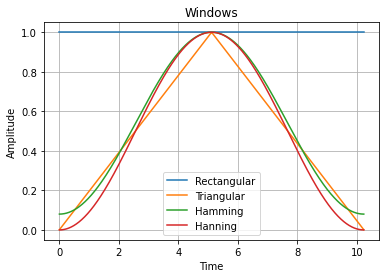

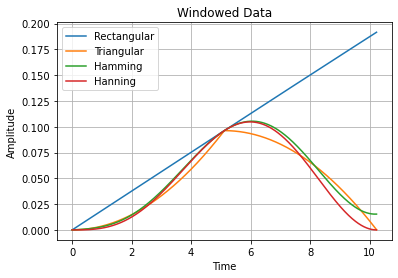

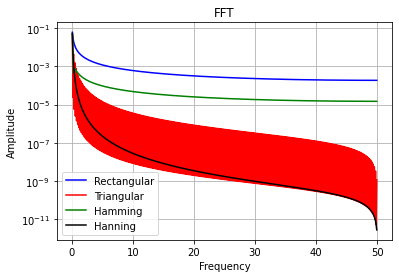

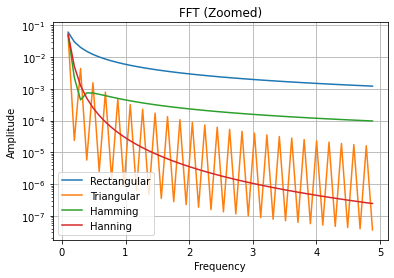

In [2]:


# Window the Data
w0 = signal.windows.boxcar(N)
w1 = signal.windows.triang(N)
w2 = signal.windows.hamming(N)
w3 = signal.windows.hann(N)

# Execute FFTs on each windowed data set
ywf0 = fft(y*w0)
ywf1 = fft(y*w1)
ywf2 = fft(y*w2)
ywf3 = fft(y*w3)

# Extract the frequency bins
xf = fftfreq(N, T)[:N//2]

# Plot the Windowed data
plt.title('Windows')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.plot(x, w0)
plt.plot(x, w1)
plt.plot(x, w2)
plt.plot(x, w3)
plt.legend(['Rectangular', 'Triangular', 'Hamming', 'Hanning'])
plt.show()

# Plot the Windows
plt.title('Windowed Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
# plt.axhline(y=0, color='k')
plt.plot(x, y*w0)
plt.plot(x, y*w1)
plt.plot(x, y*w2)
plt.plot(x, y*w3)
plt.legend(['Rectangular', 'Triangular', 'Hamming', 'Hanning'])
plt.show()

# Plot the FFT of the signals
plt.title('FFT')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf0[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf1[1:N//2]), '-r')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf2[1:N//2]), '-g')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf3[1:N//2]), '-k')
plt.legend(['Rectangular', 'Triangular', 'Hamming', 'Hanning'])
plt.grid()
plt.show()

# Zoom in
plt.title('FFT (Zoomed)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.semilogy(xf[1:N//zoom], 2.0/N * np.abs(ywf0[1:N//zoom]))
plt.semilogy(xf[1:N//zoom], 2.0/N * np.abs(ywf1[1:N//zoom]))
plt.semilogy(xf[1:N//zoom], 2.0/N * np.abs(ywf2[1:N//zoom]))
plt.semilogy(xf[1:N//zoom], 2.0/N * np.abs(ywf3[1:N//zoom]))
plt.legend(['Rectangular', 'Triangular', 'Hamming', 'Hanning'])
plt.grid()
plt.show()